# T3.3 Regresión lineal

**Índice**

> 1 Modelo<br>
>> 1.1 Regresión polinómica simple<br>
>
> 2 Estimación máximo-verosímil<br>
>> 2.1 Estimación por mínimos cuadrados<br>
>>> 2.1.1 Objetivo<br>
>>> 2.1.2 MLE de los pesos de regresión<br>
>>> 2.1.3 MLE de la varianza<br>
>>> 2.1.4 Ejemplo<br>
>>
>> 2.2 Evaluación de la bondad del ajuste<br>
>>> 2.2.1 Gráfica de residuos<br>
>>> 2.2.2 Gráfica $\hat{y}_n$ vs $y_n$<br>
>>> 2.2.3 Precisión de la predicción y $R^2$<br>

# 1 Modelo

**Regresión lineal por mínimos cuadrados:** $\;$ normal condicional para regresión, $y\in\mathbb{R}$,
$$p(y\mid\boldsymbol{x}, \boldsymbol{\theta})%
=\mathcal{N}(y\mid w_0+\boldsymbol{w}^t\boldsymbol{x},\sigma^2)$$

**Notación homogénea o compacta:** $\;\boldsymbol{w}$ absorbe el sesgo $w_0$

**Regresión simple o múltiple:** $\;$ **simple** si la entrada es unidimensional; si no, **múltiple**

## 1.1 Regresión polinómica simple

**Regresión polinómica:** $\;\boldsymbol{x}$ se procesa mediante un **extractor de características polinómico** $\phi$

**Extractor polinómico simple de grado $D$:** $\;\boldsymbol\phi(x)=[1, x, x^2, \dotsc, x^D]$

**Regresión polinómica simple:** $\;$ para varianza $\sigma^2$ fija (regresión homocedástica)
$$p(y\mid x,\boldsymbol\theta)=\mathcal{N}(y\mid f(x;\boldsymbol{w}),\sigma^2)
\quad\text{con}\quad%
f(x;\boldsymbol{w})=\boldsymbol{w}^t\boldsymbol\phi(x)=\sum_{d=0}^D w_d\,x^d$$

**Estimador de Bayes:** $\;$ con pérdida cuadrática, $\,\ell_2(y-\pi(\boldsymbol{x}))=(y-\pi(\boldsymbol{x}))^2,\,$ 
es la media a posteriori
$$\pi^*(\boldsymbol{x})%
=\operatorname*{argmin}\limits_{\pi(\boldsymbol{x})}\;%
R(y\mid\boldsymbol{x})%
=\operatorname*{argmin}\limits_{\pi(\boldsymbol{x})}\;%
\mathbb{E}_{p(y\mid\boldsymbol{x},\boldsymbol\theta)}[(y-\pi(\boldsymbol{x}))^2]%
=\mathbb{E}[y\mid\boldsymbol{x}]%
=f(\boldsymbol{x};\boldsymbol{w})$$

**Riesgo de Bayes teórico ($\boldsymbol{w}$ conocido):** $\;$ es la varianza
$$R^*(y\mid\boldsymbol{x})%
=\mathbb{E}_{p(y\mid\boldsymbol{x},\boldsymbol\theta)}[(y-\pi^*(\boldsymbol{x}))^2]%
=\mathbb{E}_{p(y\mid\boldsymbol{x},\boldsymbol\theta)}[(y-f(\boldsymbol{x};\boldsymbol{w}))^2]%
=\sigma^2$$

**Ejemplo:** $\;f(x;\boldsymbol{w})=w_0+w_1x+w_2x^2$ $\;$ con $\;w_0=0$, $\;w_1=-1.5$ $\;$ y $\;w_2=1/9$; $\;$ $\;\sigma^2=4\;$; $\;$ para $x\in[0,20]$

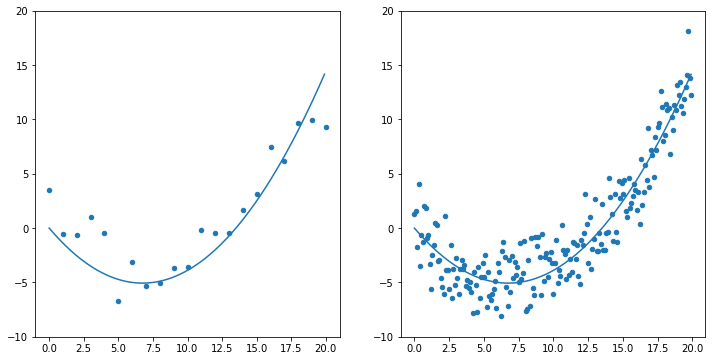

In [1]:
import numpy as np
import matplotlib.pyplot as plt
w0 = 0; w1 = -1.5; w2 = 1/9; sigma = 2; N = 21; np.random.seed(0)
X_train = np.linspace(0.0, 20, N); X_test = np.arange(0.0, 20, 0.1)
y_train = w0 + w1 * X_train + w2 * X_train * X_train + np.random.normal(0, sigma, X_train.shape)
y_test = w0 + w1 * X_test + w2 * X_test * X_test + np.random.normal(0, sigma, X_test.shape)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set_ylim([-10, 20]); axes[0].scatter(X_train, y_train, s=20)
axes[0].plot(X_test, w0 + w1 * X_test + w2 * X_test * X_test)
axes[1].set_ylim([-10, 20]); axes[1].scatter(X_test, y_test, s=20)
axes[1].plot(X_test, w0 + w1 * X_test + w2 * X_test * X_test);

# 2 Estimación máximo-verosímil

**Modelo:** $\;p(y\mid\boldsymbol{x}, \boldsymbol{\theta})=\mathcal{N}(y\mid\mu,\sigma^2)\;$ con $\;\mu=\boldsymbol{w}^t\boldsymbol{x}\;$ y $\;\boldsymbol{\theta}=(\boldsymbol{w}, \sigma^2)$

**Datos de entrenamiento:** $\;N$ datos $\mathcal{D}=\{(\boldsymbol{x}_n,y_n)\}$

## 2.1 Estimación por mínimos cuadrados

### 2.1.1 Objetivo

**Neg-log-verosimilitud:** $\;$ de $\boldsymbol{\theta}$ respecto a $\;\mathcal{D}$
$$\begin{align*}
\operatorname{NLL}(\boldsymbol{\theta})%
&=-\log p(\mathcal{D}\mid\boldsymbol{\theta})\\%
&=-\log \prod_{n=1}^N \mathcal{N}(y_n\mid \hat{y}_n, \sigma^2)%
&&\text{($\hat{y}_n=\boldsymbol{w}^t\boldsymbol{x}_n$)}\\%
&=-\sum_{n=1}^N -\frac{1}{2}\log(2\pi\sigma^2)-\frac{1}{2\sigma^2}(y_n-\hat{y}_n)^2\\%
&=\frac{N}{2}\log(2\pi\sigma^2)+\frac{1}{2\sigma^2}\sum_n (y_n-\hat{y}_n)^2%
\end{align*}$$

**Condición necesaria:** $\;$ el MLE de $\boldsymbol{\theta}$, $\hat{\boldsymbol{\theta}}$, debe satisfacer
$\;\boldsymbol{\nabla}_{\boldsymbol{\theta}}\operatorname{NLL}(\boldsymbol{\theta})\rvert_{\hat{\boldsymbol{\theta}}}=\boldsymbol{0}$

**Minimización en dos pasos:** $\;$ primero $\boldsymbol{\nabla}_{\boldsymbol{\boldsymbol{w}}}\operatorname{NLL}(\boldsymbol{\theta})\rvert_{\hat{\boldsymbol{\theta}}}=\boldsymbol{0}\;$ y luego $\;\frac{\partial \operatorname{NLL}(\boldsymbol{\theta})}{\partial\sigma^2}\Bigr\rvert_{\hat{\boldsymbol{\theta}}}=0$

### 2.1.2 MLE de los pesos de regresión

**Suma residual de cuadrados (RSS, residual sum of squares):** $\;$ equivalente a la NLL con respecto a $\boldsymbol{w}$
$$\operatorname{RSS}(\boldsymbol{w})%
=\frac{1}{2}\sum_n(y_n-\boldsymbol{w}^t\boldsymbol{x}_n)^2%
=\frac{1}{2}\lVert\mathbf{X}\boldsymbol{w}-\boldsymbol{y}\rVert_2^2%
=\frac{1}{2}(\mathbf{X}\boldsymbol{w}-\boldsymbol{y})^t(\mathbf{X}\boldsymbol{w}-\boldsymbol{y})$$

**Gradiente de la $\operatorname{RSS}$:** $\qquad\mathbf{\nabla}_{\boldsymbol{w}}\operatorname{RSS}(\boldsymbol{w})=\mathbf{X}^t\mathbf{X}\boldsymbol{w}-\mathbf{X}^t\boldsymbol{y}$

**Ecuaciones normales:** $\qquad\mathbf{X}^t\mathbf{X}\boldsymbol{w}=\mathbf{X}^t\boldsymbol{y}\quad\Leftrightarrow\quad\mathbf{X}^t(\boldsymbol{y}-\mathbf{X}\boldsymbol{w})=\boldsymbol{0}$

**Ordinary least squares (OLS):** $\qquad\hat{\boldsymbol{w}}=\mathbf{X}^{\dagger}\boldsymbol{y}\quad$ donde $\quad\mathbf{X}^{\dagger}=(\mathbf{X}^t\mathbf{X})^{-1}\mathbf{X}^t\;$ es la pseudoinversa izquierda de $\mathbf{X}$

**Calidad de OLS:** $\;$ mínimo global si $\mathbf{X}$ es de rango completo

### 2.1.3 MLE de la varianza

**Error cuadrático medio de los residuos:** $\quad\hat{\sigma}^2=\operatorname*{argmin}_{\sigma^2}\;\operatorname{NLL}(\hat{\boldsymbol{w}},\sigma^2)=\frac{1}{N}\sum_n (y_n-\hat{\boldsymbol{w}}^t\boldsymbol{x}_n)^2$

### 2.1.4 Ejemplo

Modelo con $\;\mu=f(x;\boldsymbol{w})=w_0+w_1x+w_2x^2$, $\;w_0=0$, $\;w_1=-1.5$ $\;$, $\;w_2=1/9\;$ y $\;\sigma^2=4\;$; $\;x\in[0,20]$. Generamos $N$ muestras de entrenamiento y $200$ de test uniformemente distribuidas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
w0 = 0; w1 = -1.5; w2 = 1/9; sigma = 2; N = 21; np.random.seed(0)
X_train = np.linspace(0.0, 20, N); X_test = np.arange(0.0, 20, 0.1)
y_train = w0 + w1 * X_train + w2 * X_train * X_train + np.random.normal(0, sigma, X_train.shape)
y_test = w0 + w1 * X_test + w2 * X_test * X_test + np.random.normal(0, sigma, X_test.shape)
print(X_train.shape, X_test.shape)

(21,) (200,)


Ajustamos un modelo lineal ($w_2=0$) y lo comparamos visualmente con el modelo verdadero (cuadrático).

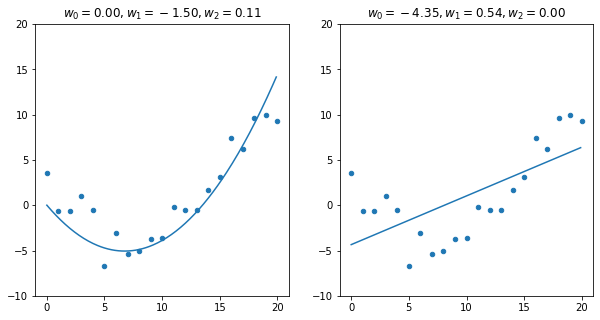

In [2]:
w = np.linalg.lstsq(np.c_[np.ones((N,1)), X_train], y_train, rcond=None)[0]
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].set_ylim([-10, 20]); axes[0].scatter(X_train, y_train, s=20)
axes[0].set_title('$w_0={:.2f}, w_1={:.2f}, w_2={:.2f}$'.format(w0, w1, w2))
axes[0].plot(X_test, w0 + w1 * X_test + w2 * X_test * X_test)
axes[1].set_ylim([-10, 20]); axes[1].scatter(X_train, y_train, s=20)
axes[1].set_title('$w_0={:.2f}, w_1={:.2f}, w_2={:.2f}$'.format(w[0], w[1], 0))
axes[1].plot(X_test, w[0] + w[1] * X_test);

Veamos que el modelo lineal ajustado minimiza la suma residual de cuadrados:

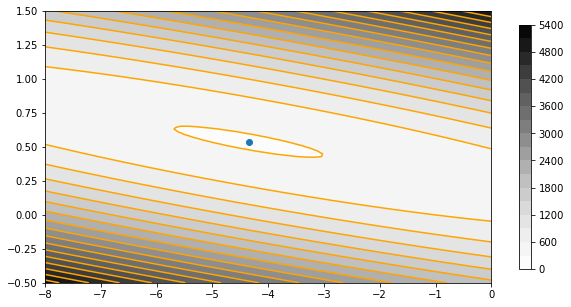

In [3]:
W0, W1 = np.meshgrid(np.linspace(-8, 0, 100), np.linspace(-0.5, 1.5, 100))
WW = np.c_[np.ravel(W0), np.ravel(W1)]
RSS = lambda ww: sum( (ww[0] + ww[1] * X_train - y_train)**2 )
RSSmap = np.apply_along_axis(RSS, 1, WW)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.contour(W0, W1, RSSmap.reshape(W0.shape), 16, colors='orange', linestyles='solid')
cp = ax.contourf(W0, W1, RSSmap.reshape(W0.shape), 16, cmap='Greys')
plt.colorbar(cp, ax=ax, shrink=0.9)
plt.scatter(w[0], w[1]);

## 2.2 Evaluación de la bondad del ajuste

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
w0 = 0; w1 = -1.5; w2 = 1/9; sigma = 2; N = 21; np.random.seed(0)
X_train = np.linspace(0.0, 20, N)
y_train = w0 + w1 * X_train + w2 * X_train * X_train + np.random.normal(0, sigma, X_train.shape)

### 2.2.1 Gráfica de residuos

**Gráfica de residuos:** $\;$ si la entrada es unidimensional, evaluamos el modelo con $\;r_n=y_n-\hat{y}_n\;$ en función de $\;x_n$

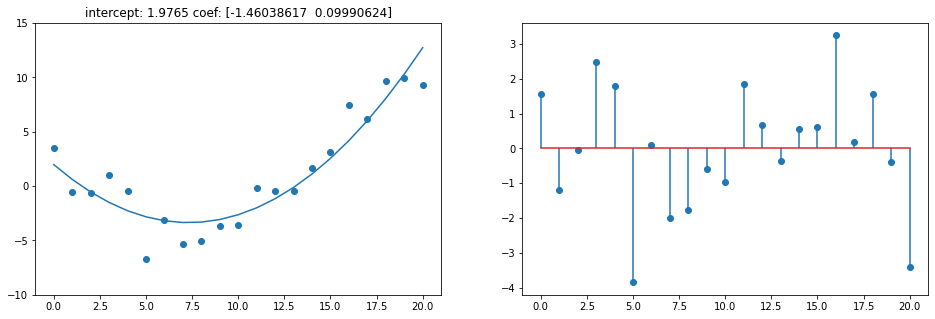

In [2]:
degree = 2 # prueba otros valores
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train.reshape(-1, 1))
regr = LinearRegression().fit(X_train_poly, y_train)
y_train_pred = regr.predict(X_train_poly)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
axes[0].set_ylim([-10, 15]); axes[0].scatter(X_train, y_train)
axes[0].set_title('intercept: {:.4f} coef: {!s:.35s}'.format(regr.intercept_, regr.coef_))
axes[0].plot(X_train, regr.intercept_ + X_train_poly @ regr.coef_)
axes[1].stem(X_train, y_train - y_train_pred);

### 2.2.2 Gráfica $\hat{y}_n$ vs $y_n$

**Gráfica $\hat{y}_n$ vs $y_n$:** $\;$ si la entrada es multidimensional, evaluamos con $\,\hat{y}_n\;$ en función de $\;y_n;\;$ mejor cuanto más próxima a la diagonal

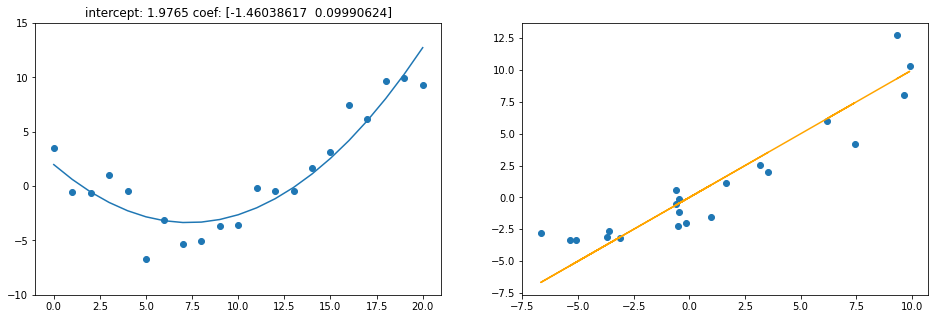

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
axes[0].set_ylim([-10, 15]); axes[0].scatter(X_train, y_train)
axes[0].set_title('intercept: {:.4f} coef: {!s:.35s}'.format(regr.intercept_, regr.coef_))
axes[0].plot(X_train, regr.intercept_ + X_train_poly @ regr.coef_)
axes[1].plot(y_train, y_train, color='orange')
axes[1].scatter(y_train, y_train_pred);

### 2.2.3 Precisión de la predicción y $R^2$

**Residual sum of squares:** $\;$ medida de calidad obvia
$$\operatorname{RSS}(\boldsymbol{w})=\sum_n(y_n-\boldsymbol{w}^t\boldsymbol{x}_n)^2$$

**Raíz del error cuadrático medio (RMSE):** $\;$ equivalente a RSS
$$\operatorname{RMSE}(\boldsymbol{w})=\sqrt{\frac{1}{N}\operatorname{RSS}(\boldsymbol{w})}$$

**Suma de cuadrados total:** $\;$ suma de errores cuadráticos si siempre se predice la media empírica
$$\operatorname{TSS}(\boldsymbol{w})=\sum_n (y_n-\bar{y})^2\quad\text{con}\quad\bar{y}=\frac{1}{N}\sum_n y_n$$

**Coeficiente de determinación:** $\;$ varianza de las predicciones en relación con predecir siempre la media empírica
$$R^2=1-\frac{\operatorname{RSS}}{\operatorname{TSS}}$$

**Interpretación de $R^2$:** $\;$ cuanto más próximo a $1$ sea, mayor será la reducción de la varianza y mejor el ajuste

In [4]:
r2 = r2_score(y_train, y_train_pred)
print('R2 en entrenamiento: {:.4f}'.format(r2))

R2 en entrenamiento: 0.8713
